<a href="https://colab.research.google.com/github/bysubanji/Nyc_taxi_ride_duration_prediction/blob/main/NYC_Taxi_trip_time_Prediction_Bhaskarsubanji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of Project  : NYC Taxi trip duration Prediction :: Predicting total ride duration of taxi trips in NYC using the given Dataset

Problem Description : 

Task is to build a model that predicts the total ride duration of taxi trips in New York City. primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and many other variables.


## Description of Data

The dataset is based of the 2016 NYC Cab trip record data, The data was originally published by the NYC Taxi and Limousine Commission.
The data was sampled and cleaned for the performing this project.

Based on individual trip attributes, you should predict the duration of each trip in the test set.

<b>NYC Taxi Data.csv</b> - The Dataset contains 1458644 trip records


### Details of Dataset
* #### id - A unique id for each trip.
* #### vendor_id - A code specifying the provider associated with the trip record.
* #### pickup_datetime - Pick up date and time or Time of meter started.
* #### dropoff_datetime -  Dropped off date and time or Time of meter started.
* #### passenger_count - Passenger count as entered by the driver.
* #### pickup_longitude - Longitude details of Pick up or when the meter started.
* #### pickup_latitude -  latitude details of Pick up or when the meter started.
* #### dropoff_longitude - Longitude details of dropoff or when the meter turned off.
* #### dropoff_latitude - latitude details of dropoff or when the meter turned of
* #### store_and_fwd_flag - This flag shows us, whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
* #### trip_duration - Its our target variable and it is duration of the trip in seconds.


# Mounting of Drive, Loading Data and Importing of the required libraries


In [ ]:
# Mounting of google drive to feth the Raw_DATA_SET
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries which are necessary and their importing.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import datetime as dt
% matplotlib inline
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Fetching the given datset using pandas
data=pd.read_csv('/content/drive/MyDrive/Projects - Almabetter/ NYC Taxi trip time Prediction - Bhaskar subanji/NYC Taxi Data.csv')

# Information About The Data

In [ ]:
#    Display first 10 indexes of the dataset
data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
#    Display last 10 indexes of the dataset
data.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,N,237
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,-73.863815,40.769684,-73.864395,40.761326,N,800
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
#    Total number of Rows and Columns in Dataset                         
#    shape of given dataframe 
data.shape

(1458644, 11)

Number of rows is:  **1458644**  & 
Number of columns is:  **11**

In [ ]:
# Variables of the given Dataset
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# NULL/NAN values in given dataset.
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Their are no NULL/NAN values present in given dataset.

In [ ]:
# Datatypes of Variables present in data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

The variables such as pickup_datetime, dropoff_datetime of the type 'object'.

Converting them into type 'datetime'.

In [ ]:
# Converting them into type 'datetime'
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Creation of Variables

In [ ]:
# Creation of NEW Variables
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['Pickpday_No']=data['pickup_datetime'].dt.weekday
data['Hour_of_Pickup']=data['pickup_datetime'].dt.hour
data['month']=data['pickup_datetime'].dt.month

Following variables have been created:

*   pickup_day : it contains the name of the day on which the 
ride was taken.
*   Pickpday_No : it contains the day number, instead of characters with Monday = 0 and Sunday = 6.

*   Hour_of_Pickup : it contains of the day in the 24 hour format.
*   pickup_month : it contains month number i`e January = 1    and December = 12.

In [ ]:
#Let`s see places were booked the most using our maps
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in data.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="purple")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)
display(mapa)

But, we are unable to get any insights or draw conclusions from that. So,we will extract the variable from this is -> "distance".

In [ ]:
# Using geographical coordinates we will calculate the distance by Importing the library
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

#    Applying the above details and creating the feature ‘distance’
data['distance'] = data.apply(lambda x: cal_distance 
                              (x['pickup_latitude'],x['pickup_longitude'],
                               x['dropoff_latitude'],x['dropoff_longitude'] ),
                               axis=1)

# Calculation of SPEED in KM per Hour
data['speed'] = (data.distance/(data.trip_duration/3600))

Create a slots of time in a day, to determine what time of the day the ride was taken.

Creating the four slots of time:-

1.  Morning ( 6:00 am to 11:59 pm),

2.  Afternoon ( 12 noon to 3:59 pm),

3.  Evening ( 4:00 pm to 9:59 pm), and

4.  Late Night ( 10:00 pm to 5:59 am)

In [ ]:
# Creating the slots of time in days
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'


# Now using above function and create new columns in the dataset.
data['PickupTime_of_day']=data['Hour_of_Pickup'].apply(time_of_day)

# Dataset description after creating new variables
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,Pickpday_No,Hour_of_Pickup,month,distance,speed,PickupTime_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


# Univariate Analysis

Lets see the target variable which is trip_duration
and it may have some outliers, we will plot it's graph.

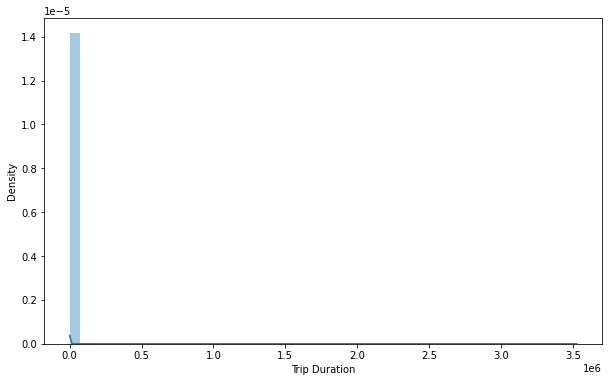

In [ ]:
# 'trip_duration' is a dependent variable 
plt.figure(figsize = (10,6))
sns.distplot((data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

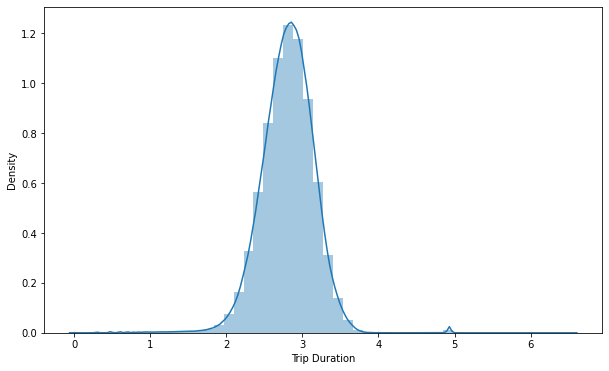

In [ ]:
# This shows right skewness, hence apply the log10 to transform it to the normal distribution.
plt.figure(figsize = (10,6))
sns.distplot(np.log10(data['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

its observed that trip_duration is normally distributed.

Plot the boxplot and check for Outliers

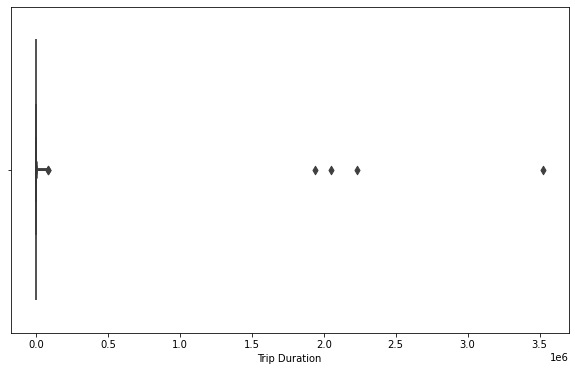

In [ ]:
plt.figure(figsize = (10,6))
sns.boxenplot(data.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

Outliers are present and should be removed for the data consistency.

In [ ]:
# checking for Outliers and removing them 
# Calculating 0-100 percentille to detect a correct percentile value for the removal of outlier.
for i in range(0,100,10):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
# Some inconsistency has been observed in 90-100,
# we will further dig into 90-100 percentile to analyse the data and check for the outliers in order to remove

for i in range(90,100):
  duration= data['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


Visualization of Number trips taken with respect to trip duration

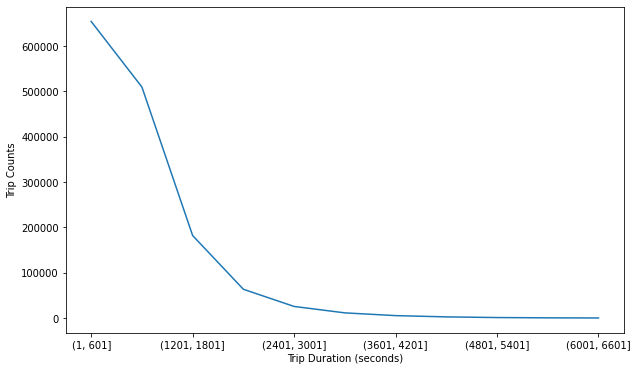

In [ ]:
# Visualization of Number trips taken with respect to trip duration
plt.figure(figsize = (10,6))
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(1,7200,600))).count().plot(kind='line')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Counts' )
plt.show()

As per the above observation, most of the trip duration is completed in 1 hour(3600 seconds).

As per the above observation a very few trips have duration more than 5000 seconds and some are with as low as 1 second(0 km distance)

In [ ]:
# To maintain the data consistency, we will remove these outliers,
# (trips with duration more than 5000 seconds and less than 60 seconds) 
data = data[data.trip_duration <= 5000]
data = data[data.trip_duration >= 60]

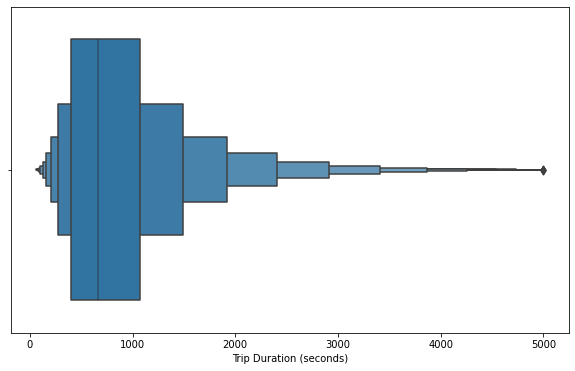

In [ ]:
# Plotting for insights
plt.figure(figsize = (10,6))
sns.boxenplot(data.trip_duration)
plt.xlabel('Trip Duration (seconds)')
plt.show()

Most of the trips durations took between 10-20 mins to complete.
As observed most of the trips took 0 - 30 mins to complete(1800 seconds)

Also check for other variables

##Passenger count

Before analysing the passenger count, we know that its impossible to have more than 6 passengers in a Cab Or Zero passengers in Booked cab, so its time to define or remove the rows which have 0 or more than 6 passenger count.

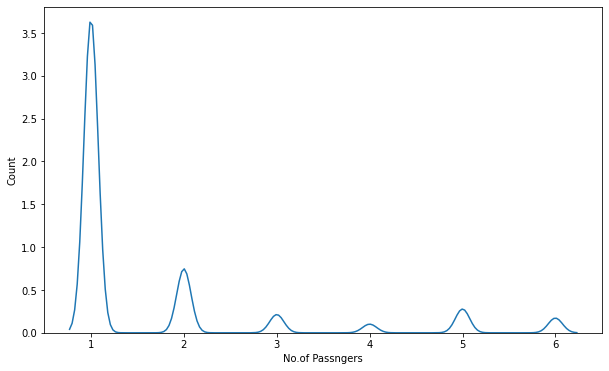

In [ ]:
# Assuming the passenger count. If any, removing the rows which have Zero(0) or more than 6 passenger count.
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

# Passenger count
plt.figure(figsize = (10,6))
sns.kdeplot(x='passenger_count',data=data)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()


As per above observations, it is to be noted that highest amount of trips were taken by a single passenger and large group of people travelling together is rare compared to single passenger.

## Slotwise trips per Day



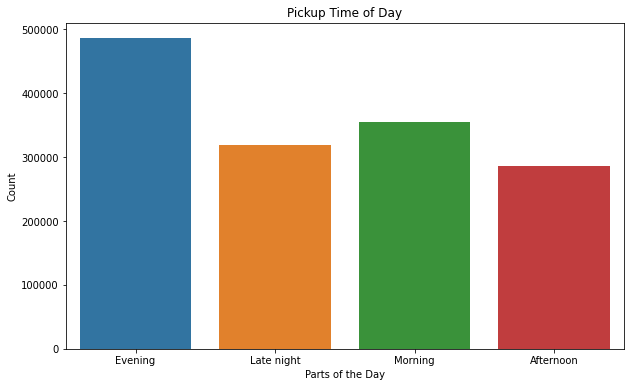

In [ ]:
# Trips per time_slots
plt.figure(figsize = (10,6))
sns.countplot(x="PickupTime_of_day", data=data)
plt.title('Pickup Time of Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

Evenings are the busiest and top among  the all.

## Trips per hour

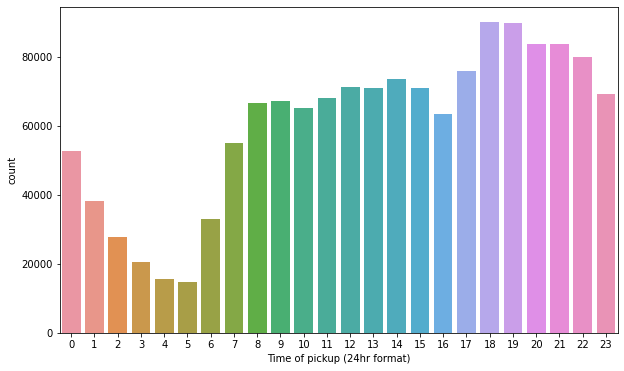

In [ ]:
# Analyzing the trips per hour
plt.figure(figsize = (10,6))
sns.countplot(data.Hour_of_Pickup)
plt.xlabel('Time of pickup (24hr format)')
plt.show()

6:00 pm to 7:00 pm were the busiest hours, which makes sense as this is the time for people to return home from school/work.



## Trips per week day

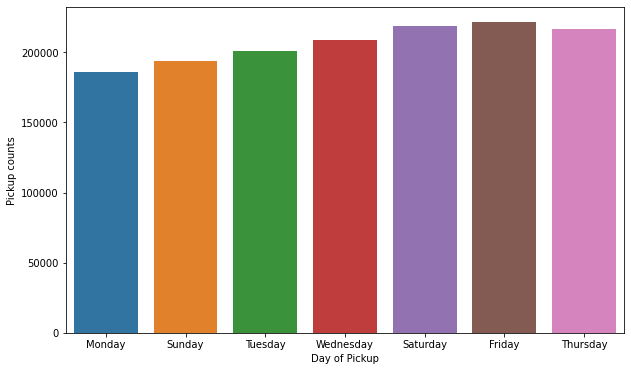

In [ ]:
# Analyzing the trips per week day
plt.figure(figsize = (10,6))
sns.countplot(data.pickup_day)
plt.xlabel('Day of Pickup')
plt.ylabel('Pickup counts')
plt.show()

As observed above, Fridays are the busiest followed by Saturday and it may be because of weekend.



##  Trips per month

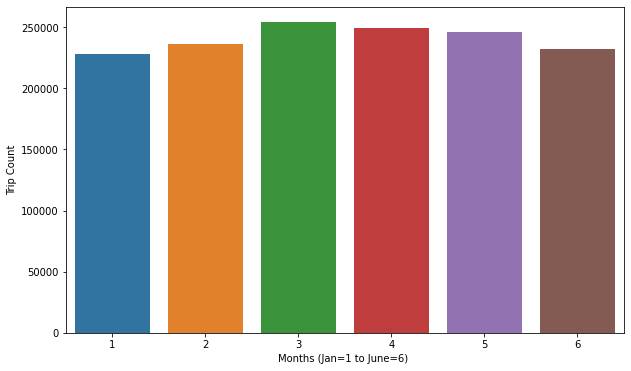

In [ ]:
# Analyzing the trips per month
plt.figure(figsize = (10,6))
sns.countplot(data.month)
plt.ylabel('Trip Count')
plt.xlabel('Months (Jan=1 to June=6) ')
plt.show()

No variance or not much difference between months.


## Store and Forward Flag

In [ ]:
## Analyzing the store and forward flag
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994564
Y    0.005436
Name: store_and_fwd_flag, dtype: float64

As per the above observation only 1% of the trip details were stored in the vehicle memory first before sending it to the server and this might have occured due to of GPS or mobile device issues or battery was down when the trip finished.





## Distance

In [ ]:
# Analyzing the Distance
data['distance'].value_counts()

0.000000    4216
0.000424       8
0.000424       6
0.000848       4
0.001273       4
            ... 
1.034629       1
1.934613       1
0.556118       1
1.327394       1
1.524941       1
Name: distance, Length: 1441998, dtype: int64

lets have a look at the boxplot.

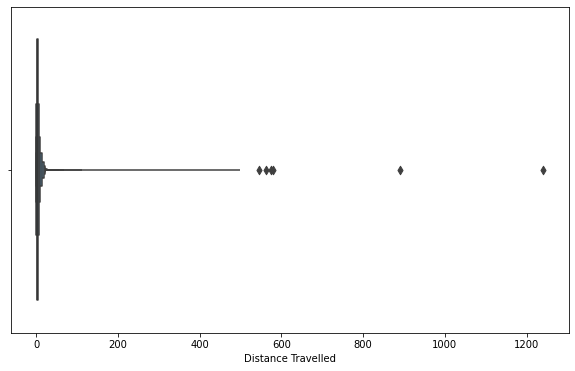

In [ ]:
plt.figure(figsize = (10,6))
sns.boxenplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

*   There are some trips with over 100 km distance and some trips with 0 km distance.

The possible reasons for zero km trips can be:
*   The dropoff location couldn’t be tracked.
*   The passengers or driver cancelled the trip due to some or issue technical issue in software, etc.

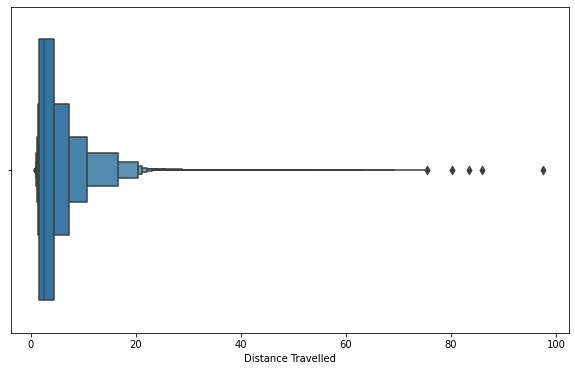

In [ ]:
# Removing the outliers and updating the value
data = data[~(data.distance > 100)]
data = data[~(data.distance < 1)]

#Plotting the Boxenplot
plt.figure(figsize = (10,6))
sns.boxenplot(data.distance)
plt.xlabel('Distance Travelled')
plt.show()

## Speed

In [ ]:
# Speed value counts
data['speed'].value_counts()

9.580937     2
12.569185    1
13.539540    1
20.976411    1
18.756636    1
            ..
10.918117    1
18.773963    1
8.887311     1
18.987874    1
14.245843    1
Name: speed, Length: 1209250, dtype: int64

In [ ]:
# Largest value of speed
data['speed'].nlargest(10)

693299     583.735137
1359910    564.208013
218935     520.505501
500725     424.861414
473439     356.616642
191997     318.580003
793555     270.595438
1328401    255.419847
176589     226.716083
656806     197.129414
Name: speed, dtype: float64

plotting the boxplot for better understanding.

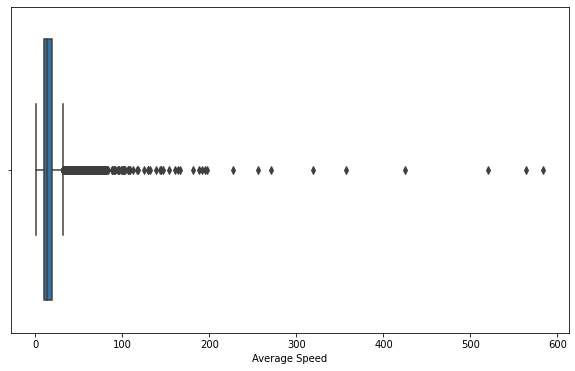

In [ ]:
# Plotting boxplot
plt.figure(figsize = (10,6))
sns.boxplot(data.speed)
plt.xlabel('Average Speed')
plt.show()

*   Some trips were done at a speed of over 100 km/h.





As per the rule, the speed limit approx. 40km/h in New York City.
So having average speed of over 60km/h is quite unreasonable.

In [ ]:
# Averge speed less than 60
data = data[~(data.speed >60)]

In [ ]:
## look at the smallest speeds as well.
print( data['speed'].nsmallest(10))

1165873    0.777462
24426      0.825900
1025910    0.877407
1440074    0.900916
1453671    0.913801
440689     0.954780
210725     0.962457
985326     0.988256
623249     0.991219
251672     0.998664
Name: speed, dtype: float64


Some observations showing that speeds which are less than 1 km/hr for a trip which is quite unreasonable.

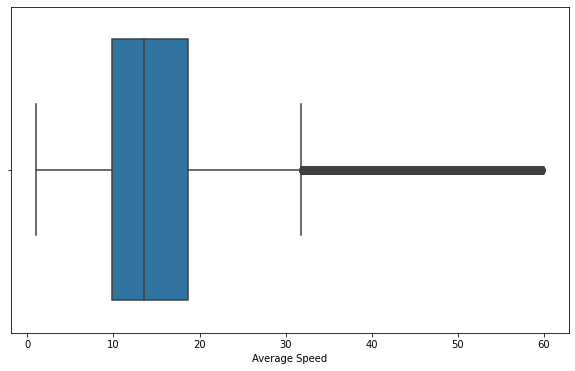

In [ ]:
# Removing the data with less than avg 1km speed
data = data[~(data.speed <1)]

# Plotting of Boxplot
plt.figure(figsize = (10,6))
sns.boxplot(data.speed)
plt.xlabel('Average Speed')
plt.show()

## Speed range ditribution with the help of graph.

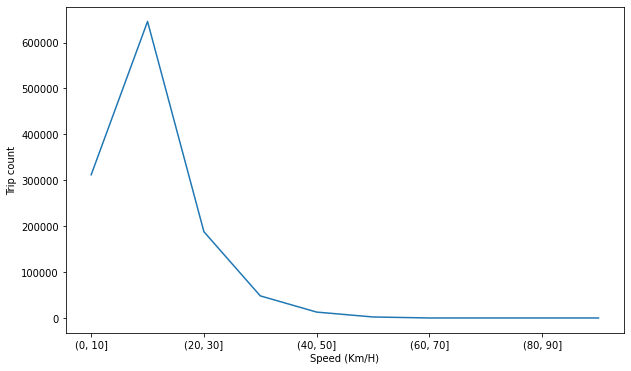

In [ ]:
# Speed range per trip count
plt.figure(figsize = (10,6))
data.speed.groupby(pd.cut(data.speed, np.arange(0,104,10))).count().plot(kind = 'line')
plt.ylabel('Trip count')
plt.xlabel('Speed (Km/H)')
plt.show()

*   Most of the trips are completed at a speed range of 10-20 km/h.



## Vendor Identifier

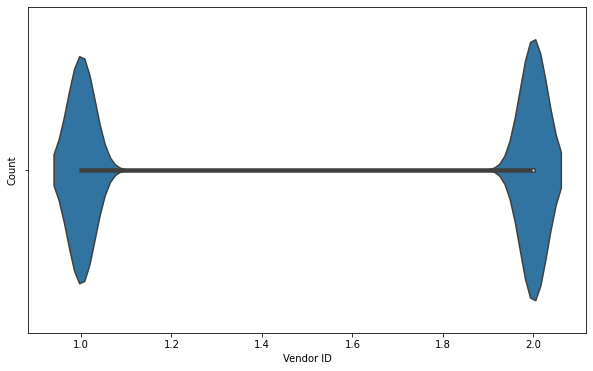

In [ ]:
# Analyzing the Vendor_id Variable
plt.figure(figsize = (10,6))
sns.violinplot(data.vendor_id)
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.show()

As per above observations, trips taken by both vendors not have much difference.

# Bivariate Analysis

## Trip Duration per hour

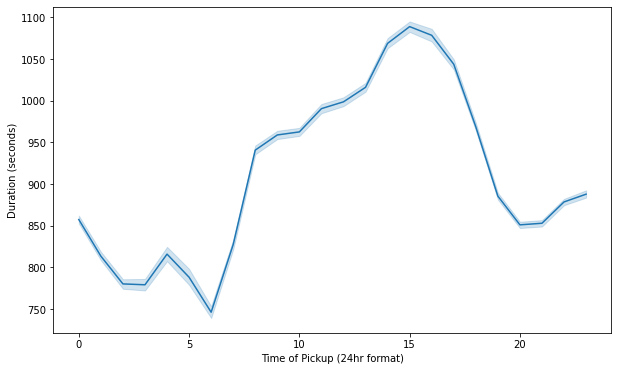

In [ ]:
# Plotting for hour of pickup, trip duration
plt.figure(figsize = (10,6))
sns.lineplot(x='Hour_of_Pickup',y='trip_duration',data=data)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

*   As per observation, trip duration is the maximum around 3 pm,traffic might be the reason.
*   Around 6 am trip duration is the lowest as the streets may not be busy.

## Trip duration per weekday

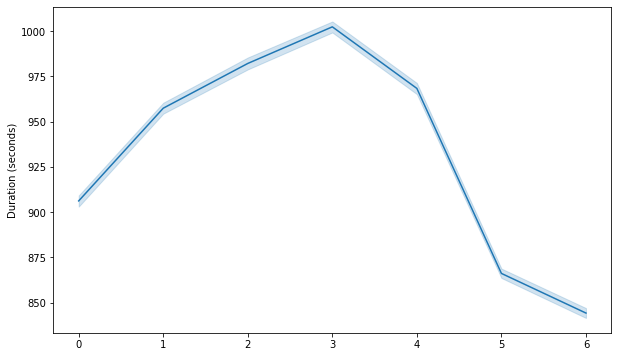

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x='Pickpday_No',y='trip_duration',data=data)
plt.ylabel('Duration (seconds)')
plt.xlabel('')
plt.show()

*   Trip duration on thursday is longest among all days.

*   From February, we can see trip duration rising every month.
*   There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. 



## Trip duration per month

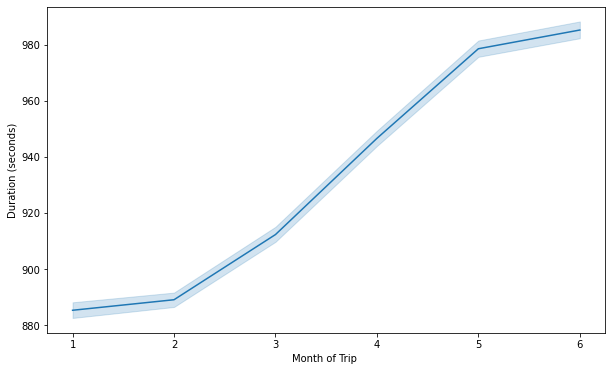

In [ ]:
# Analyzing trip duration month
plt.figure(figsize = (10,6))
sns.lineplot(x='month',y='trip_duration', data=data)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')

plt.show()

## Trip Duration per Store and Forward Flag

<Figure size 720x432 with 0 Axes>

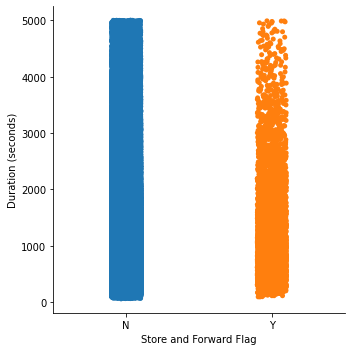

In [ ]:
# Analyzing Trip Duration per Store and Forward Flag
plt.figure(figsize = (10,6))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

There is not much difference between N and Y.

## Trip Duration per Vendor

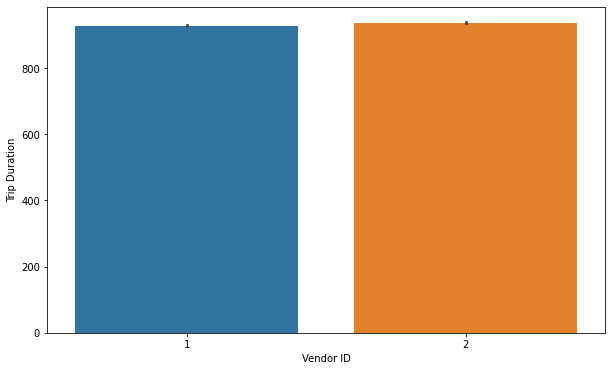

In [ ]:
# Analyzing trip duration per vendor
plt.figure(figsize = (10,6))
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

compared to vendor 1, Vendor id 2 takes longer trips.

## Distance and Hour

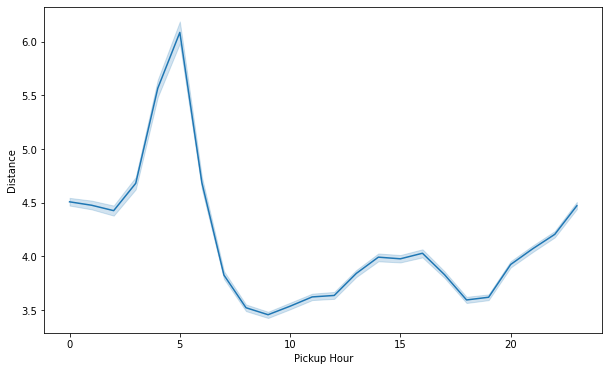

In [ ]:
# plotting for distance to hour
plt.figure(figsize = (10,6))
sns.lineplot(y='distance',x='Hour_of_Pickup',data=data)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
Trip distance is highest during early morning hours.
It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.



## Distance and Trip Duration

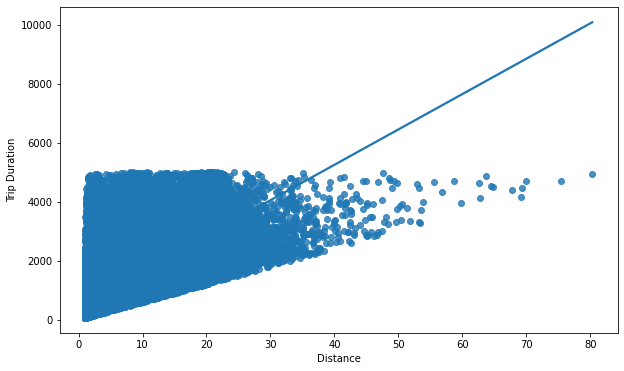

In [ ]:
# We should remove those trips which covered 0 km distance.
data = data[~(data.distance == 0)]

# Plotting graph for trip duration and Distance
plt.figure(figsize = (10,6))
sns.regplot(data.distance, data.trip_duration)
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()


The straight line shows some linear relation between the two.

## Distance per Weekday

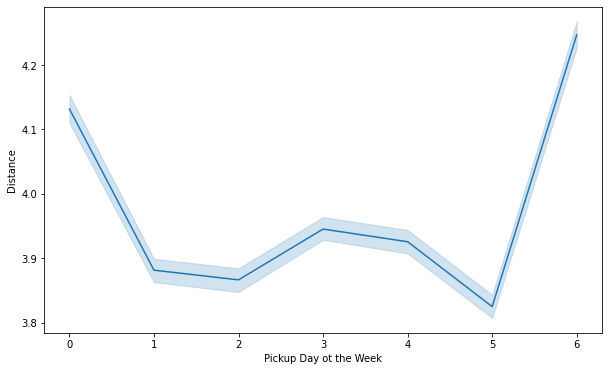

In [ ]:
# Analyzing distance per weekday
plt.figure(figsize = (10,6))
sns.lineplot(x='Pickpday_No', y='distance',data=data)
plt.ylabel('Distance')
plt.xlabel('Pickup Day ot the Week')
plt.show()

Fairly distributed with avg distance of 3.5km hour and sunday being the top, outstation trips or weekend trips may be the reason.

## Distance and Month

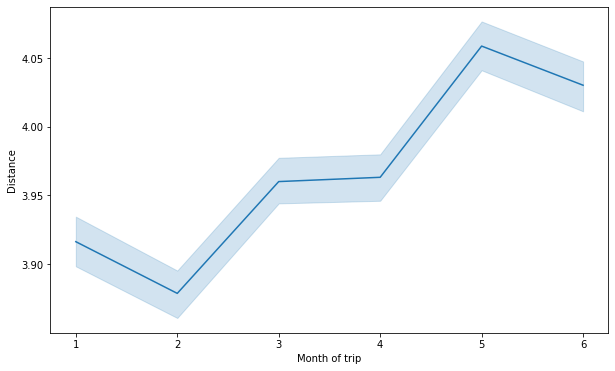

In [ ]:
# Distance per month
plt.figure(figsize = (10,6))
sns.lineplot(x='month', y='distance',data=data)
plt.ylabel('Distance')
plt.xlabel('Month of trip')
plt.show()

Trip distance is lowest in 2nd month and maximum in 5th month.



## Distance and Store and Forward Flag

<Figure size 720x432 with 0 Axes>

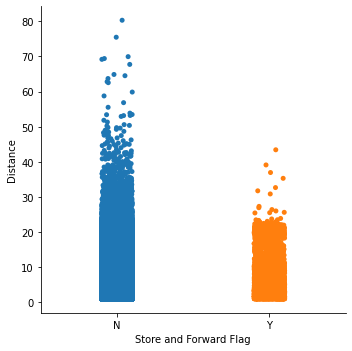

In [ ]:
# Analyzing distance to store_frwd_flag
plt.figure(figsize = (10,6))
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind='strip')
plt.ylabel('Distance')
plt.xlabel('Store and Forward Flag')
plt.show()

As observed for longer distances the trip is not stored.

## Distance and Vendor

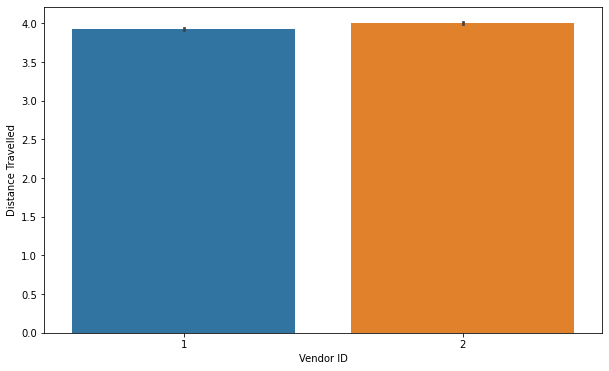

In [ ]:
# Comparing distance and vendor
plt.figure(figsize = (10,6))
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

As shown in above, Similar distribution has been observed btw both the vendors



# Feature Engineering

## One Hot Encoding

Features like 'store_and_fwd_flag', and 'pickup_day' are dummified.

In [ ]:
# Dummyfying the features

dummy = pd.get_dummies(data.store_and_fwd_flag, prefix='store_and_fwd_flag')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_day, prefix='pickup_day', drop_first=True)
data = pd.concat([data,dummy], axis = 1,)

In [ ]:
# Trip_duration in hours
data['trip_duration_hour']=data['trip_duration']/3600

In [ ]:
# Removing the variables, which are not necessary for further analysis
data=data.drop(['id','pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag', 'pickup_day', 'dropoff_day', 'Pickpday_No', 'PickupTime_of_day', 'trip_duration', 'speed'], axis=1)
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Hour_of_Pickup,month,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,trip_duration_hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,0.126389
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,0.184167
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,6.385108,1,0,0,0,0,0,1,0,0.590000
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,1.485501,1,0,0,0,0,0,0,1,0.119167
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,1.188590,1,0,0,1,0,0,0,0,0.120833


In [ ]:
# Informatoin of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208841 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1208841 non-null  int64  
 1   passenger_count       1208841 non-null  int64  
 2   pickup_longitude      1208841 non-null  float64
 3   pickup_latitude       1208841 non-null  float64
 4   dropoff_longitude     1208841 non-null  float64
 5   dropoff_latitude      1208841 non-null  float64
 6   Hour_of_Pickup        1208841 non-null  int64  
 7   month                 1208841 non-null  int64  
 8   distance              1208841 non-null  float64
 9   store_and_fwd_flag_N  1208841 non-null  uint8  
 10  store_and_fwd_flag_Y  1208841 non-null  uint8  
 11  pickup_day_Monday     1208841 non-null  uint8  
 12  pickup_day_Saturday   1208841 non-null  uint8  
 13  pickup_day_Sunday     1208841 non-null  uint8  
 14  pickup_day_Thursday   1208841 non-

In [ ]:
# Shape of Data
data.shape

(1208841, 18)

In [ ]:
# Checking for NAN/NULL values
data.isnull().sum()

vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
Hour_of_Pickup          0
month                   0
distance                0
store_and_fwd_flag_N    0
store_and_fwd_flag_Y    0
pickup_day_Monday       0
pickup_day_Saturday     0
pickup_day_Sunday       0
pickup_day_Thursday     0
pickup_day_Tuesday      0
pickup_day_Wednesday    0
trip_duration_hour      0
dtype: int64

NAN/NULL values are not present

# Now, Splitting the data into train and test dataset, before fitting data into our models.

In [ ]:
# Checking numerical features
features= data.describe().columns
features= list(features)
features= features[:-1]
features

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'Hour_of_Pickup',
 'month',
 'distance',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday']

In [ ]:
# Length of Features
len(features)

17

In [ ]:
# Since, The dataset is having more rows,lets select some portion of it for the Training purpose.
from scipy.stats import zscore
#Train test split
X = data[features].apply(zscore)[:]
y=data['trip_duration_hour'][:]

In [ ]:
# train_test_split imported using sklearn library
from sklearn.model_selection import train_test_split

# data set splitted into 75-25 for training and testing purpose respectively,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# checking Shape of data set splitted into 75-25,
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(906630, 17) (906630,)
(302211, 17) (302211,)


# Linear regression

## Linear Regression

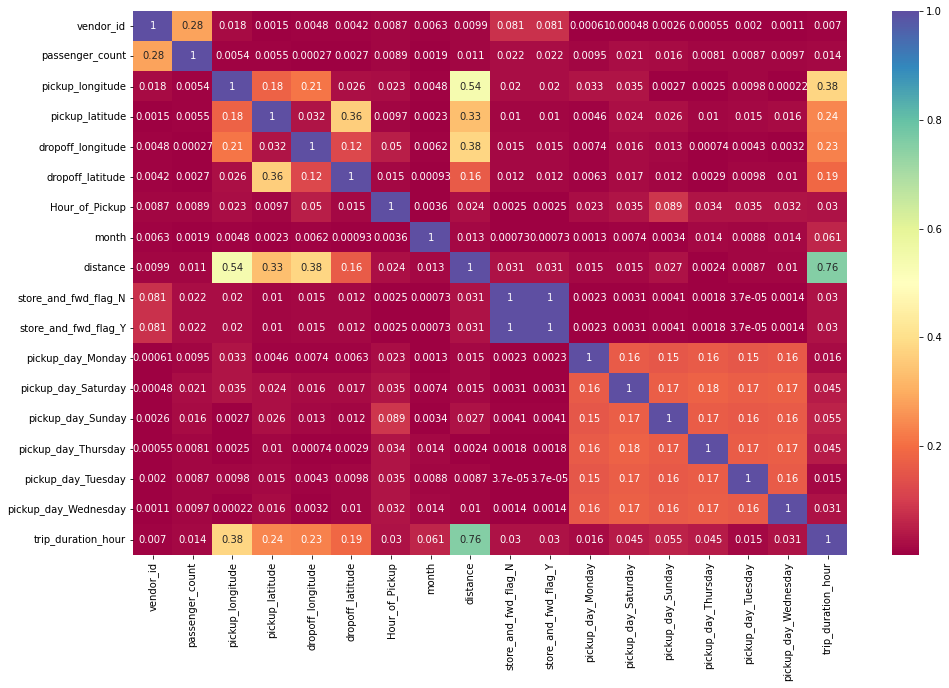

In [ ]:
# Correalation analysis using heatmap
plt.figure (figsize= (16,10))
corelation= data.corr()
sns.heatmap(abs(corelation), annot=True, cmap='Spectral')

In [ ]:
# Fit into linear regression for train and test
reg = LinearRegression().fit(X_train, y_train)

reg.score(X_train, y_train)

0.5961329154881718

In [ ]:
# Training and test pred
y_pred_train = reg.predict(X_train)

y_pred_test = reg.predict(X_test)

## Evaluation

In [ ]:
# Importing required metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# for train set metric
lr_trn_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_trn_mse)

lr_trn_rmse = np.sqrt(lr_trn_mse)

print("Train RMSE :" ,lr_trn_rmse)

lr_trn_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_trn_r2) 

lr_trn_r2_ = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_trn_r2_)

Train MSE : 0.012777397074833316
Train RMSE : 0.1130371490919393
Train R2 : 0.5961329154881718
Train Adjusted R2 :  0.5961253425237321


In [ ]:
# For test set metrics
lr_tst_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_tst_mse)

lr_tst_rmse = np.sqrt(lr_tst_mse)

print("Test RMSE :" ,lr_tst_rmse)

lr_tst_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_tst_r2)

lr_tst_r2_ = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_tst_r2_)

Test MSE : 0.012800677392528211
Test RMSE : 0.1131400786305552
Test R2 : 0.5952710966398272
Test Adjusted R2 :  0.595248328437529


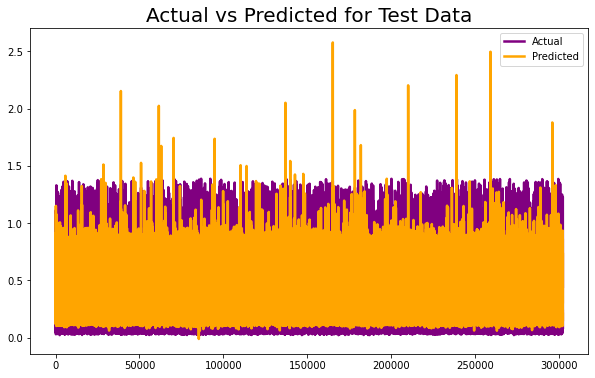

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

It has high prediction error on the metrics we tested.
Linear regression model does not provide us with high accuracy.

# Lasso Regression

In [ ]:
# Importing required models
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# Best fit Alpha value
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}
The R2 score using the same alpha is : 0.5960767666982186


In [ ]:
lasso_regressor.score(X_train, y_train)

0.5961333472111615

In [ ]:
# Making prediction
y_pred_lasso_train = lasso_regressor.predict(X_train)

y_pred_lasso_test = lasso_regressor.predict(X_test)

Evaluation of model

In [ ]:
# Traning metrics
lasso_trn_mse  = mean_squared_error(y_train, y_pred_lasso_train)
print("Train MSE :" , lasso_trn_mse)

lasso_trn_rmse = np.sqrt(lasso_trn_mse)
print("Train RMSE :" ,lasso_trn_rmse)

lasso_trn_r2 = r2_score(y_train, y_pred_lasso_train)
print("Train R2 :" ,lasso_trn_r2)

lasso_trn_r2_= 1-(1-r2_score(y_train, y_pred_lasso_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", lasso_trn_r2)

Train MSE : 0.012777383416141442
Train RMSE : 0.11303708867509567
Train R2 : 0.5961333472111615
Train Adjusted R2 :  0.5961333472111615


In [ ]:
# Testing metrics
lasso_tst_mse  = mean_squared_error(y_test, y_pred_lasso_test)
print("Test MSE :" , lasso_tst_mse)

lasso_tst_rmse = np.sqrt(lasso_tst_mse)
print("Test RMSE :" ,lasso_tst_rmse)

lasso_tst_r2 = r2_score(y_test, y_pred_lasso_test)
print("Test R2 :" ,lasso_tst_r2)

lasso_tst_r2_= 1-(1-r2_score(y_test, y_pred_lasso_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", lasso_tst_r2_)

Test MSE : 0.0128006078494542
Test RMSE : 0.11313977129839975
Test R2 : 0.5952732954369078
Test Adjusted R2 :  0.5952505273583037


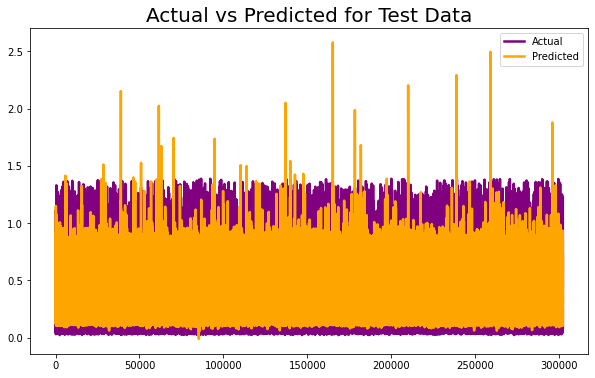

In [ ]:
#Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_lasso_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

As per observation, Lasso regresion model doesn't improve on the Linear model either.

# Decision Tree Regressor

In [ ]:
# importing decision tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
#the cache variables contains the best parameters for the Decision Tree to save time when running again
cache = {
              'max_depth' : [10],
              'min_samples_split' : [10],
              'min_samples_leaf' : [22]}

In [ ]:
dt = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt,
                       param_grid = cache,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.3s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.7212740058036056

In [ ]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)

In [ ]:
# Making prediction
y_pred_dt_train=dt_grid.predict(X_train)

y_pred_dt_test=dt_grid.predict(X_test)

In [ ]:
# training metrics
dt_trn_mse  = mean_squared_error(y_train, y_pred_dt_train)
print("Train MSE :" , dt_trn_mse)

dt_trn_rmse = np.sqrt(dt_trn_mse)
print("Train RMSE :" ,dt_trn_rmse)

dt_trn_r2 = r2_score(y_train, y_pred_dt_train)
print("Train R2 :" ,dt_trn_r2)

dt_trn_r2_= 1-(1-r2_score(y_train, y_pred_dt_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", dt_trn_r2_)

Train MSE : 0.008662683574221236
Train RMSE : 0.09307353852852719
Train R2 : 0.726190495710577
Train Adjusted R2 :  0.7261853614728073


In [ ]:
# Testing metrics
dt_tst_mse  = mean_squared_error(y_test, y_pred_dt_test)
print("Test MSE :" , dt_tst_mse)
dt_tst_rmse = np.sqrt(dt_tst_mse)
print("Test RMSE :" ,dt_tst_rmse)

dt_tst_r2 = r2_score(y_test, y_pred_dt_test)
print("Test R2 :" ,dt_tst_r2)

dt_tst_r2_= 1-(1-r2_score(y_test, y_pred_dt_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_tst_r2_)

Test MSE : 0.008855467343187718
Test RMSE : 0.09410349272576293
Test R2 : 0.7200098497410602
Test Adjusted R2 :  0.7199940987721285


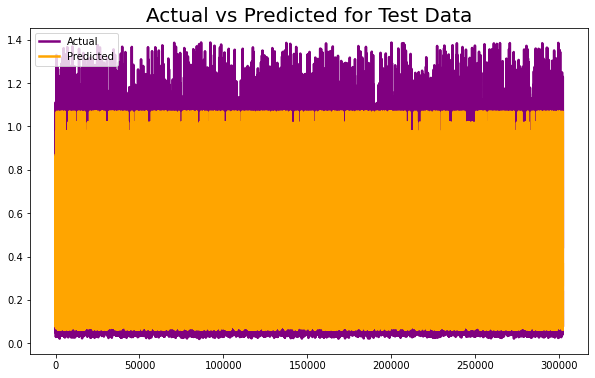

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_dt_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

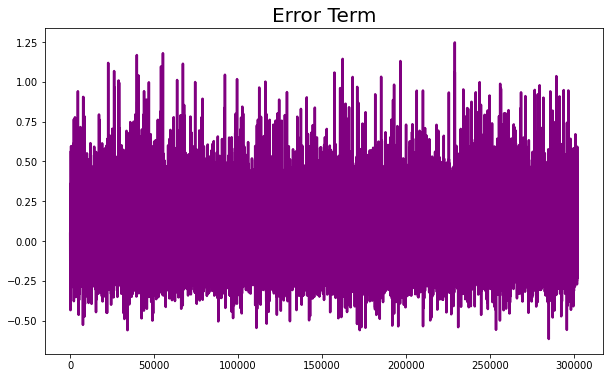

In [ ]:
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_dt_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

The decision tree improved the predictions much better than Linear models.

# Ridge Regression

Ridge Regression

In [ ]:
# Importing Ridge
from sklearn.linear_model import Ridge

# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
# best fit alpha value
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 40}
The R2 score using the same alpha is : 0.5960767666982186


In [ ]:
# Estimator
ridge_regressor.best_estimator_

Ridge(alpha=40)

In [ ]:
ridge_regressor.score(X_train, y_train)

0.5961333446816324

In [ ]:
# Making prediction
y_pred_ridge_train=ridge_regressor.predict(X_train)
y_pred_ridge_test = ridge_regressor.predict(X_test)

In [ ]:
# Training metrics
ridge_trn_mse  = mean_squared_error(y_train, y_pred_ridge_train)
print("Train MSE :" , ridge_trn_mse)

ridge_trn_rmse = np.sqrt(ridge_trn_mse)
print("Train RMSE :" ,ridge_trn_rmse)

ridge_trn_r2 = r2_score(y_train, y_pred_ridge_train)
print("Train R2 :" ,ridge_trn_r2)

ridge_trn_r2_= 1-(1-r2_score(y_train, y_pred_ridge_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", ridge_trn_r2)

Train MSE : 0.01277738349616975
Train RMSE : 0.11303708902908703
Train R2 : 0.5961333446816324
Train Adjusted R2 :  0.5961333446816324


In [ ]:
# Testing metrics
ridge_tst_mse  = mean_squared_error(y_test, y_pred_ridge_test)
print("Test MSE :" , ridge_tst_mse)

ridge_tst_rmse = np.sqrt(ridge_tst_mse)
print("Test RMSE :" ,ridge_tst_rmse)

ridge_tst_r2 = r2_score(y_test, y_pred_ridge_test)
print("Test R2 :" ,ridge_tst_r2)

ridge_tst_r2_= 1-(1-r2_score(y_test, y_pred_ridge_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", ridge_tst_r2_)

Test MSE : 0.012800611223006823
Test RMSE : 0.11313978620718187
Test R2 : 0.5952731887726892
Test Adjusted R2 :  0.5952504206880849


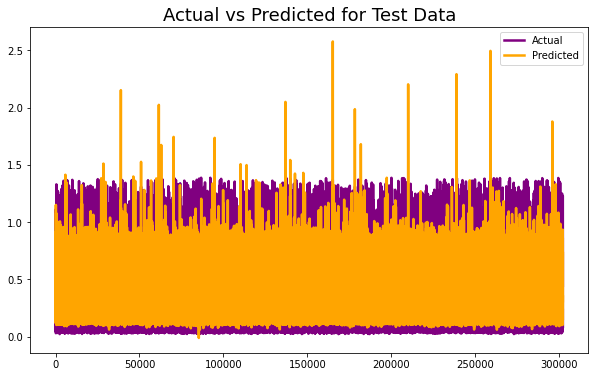

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_ridge_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=18)
plt.legend(["Actual", "Predicted"])
plt.show()

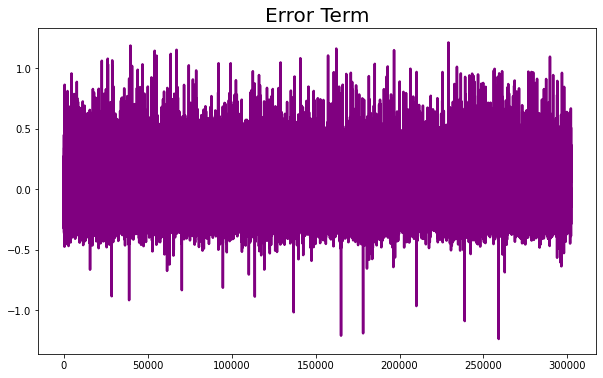

In [ ]:
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_ridge_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

As per above "error term" observation their is no improvement on linear model by ridge regression.

## XGBoost_Regressor

In [ ]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
#the cache variables contains the best parameters for the XGBoost which we already tested before to save time when running it again.
cache = {'n_estimators' : [200],
              'max_depth' : [8],
             'min_samples_' : [40],
             'learning_rate' : [0.2],
             }

In [ ]:
param_xgb

{'learning_rate': [0.2, 0.4, 0.6],
 'max_depth': [5, 8, 10],
 'min_samples_': [40, 50],
 'n_estimators': [80, 150, 200]}

In [ ]:
# Importing XGbooster
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid = cache,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[03:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:56:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [ ]:
xgb_grid.best_score_

0.8061626560991663

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 40, 'n_estimators': 200}

In [ ]:
# Making predictions
y_pred_xgb_train=xgb_grid.predict(X_train)
y_pred_xgb_test=xgb_grid.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Training metrics
xgb_trn_mse  = mean_squared_error(y_train, y_pred_xgb_train)
print("Train MSE :" , xgb_trn_mse)

xgb_trn_rmse = np.sqrt(xgb_trn_mse)
print("Train RMSE :" ,xgb_trn_rmse)

xgb_trn_r2 = r2_score(y_train, y_pred_xgb_train)
print("Train R2 :" ,xgb_trn_r2)

xgb_trn_r2_= 1-(1-r2_score((y_train), (y_pred_xgb_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ", xgb_trn_r2_)

Train MSE : 0.005227472809450798
Train RMSE : 0.07230126423134521
Train R2 : 0.834770400375517
Train Adjusted R2 :  0.8347673021337183


In [ ]:
# Testing metrics
xgb_tst_mse  = mean_squared_error(y_test, y_pred_xgb_test)
print("Test MSE :" , xgb_tst_mse)

xgb_tst_rmse = np.sqrt(xgb_tst_mse)
print("Test RMSE :" ,xgb_tst_rmse)

xgb_tst_r2 = r2_score(y_test, y_pred_xgb_test)
print("Test R2 :" ,xgb_tst_r2)

xgb_tst_r2_= 1-(1-r2_score((y_test), (y_pred_xgb_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ", xgb_tst_r2_)

Test MSE : 0.006089656874662824
Test RMSE : 0.07803625359192241
Test R2 : 0.8074586154197863
Test Adjusted R2 :  0.8074477839195932


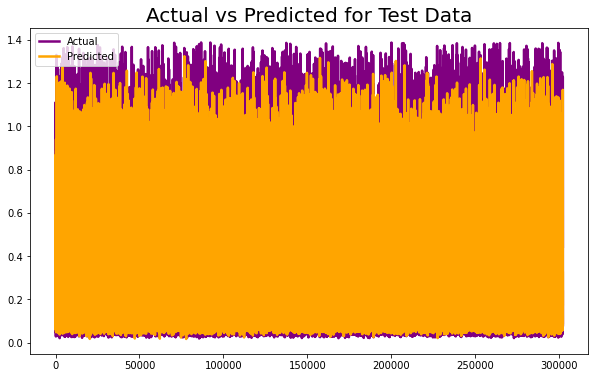

In [ ]:
# Actual vs Prediction
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='purple', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_xgb_test, color='orange', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

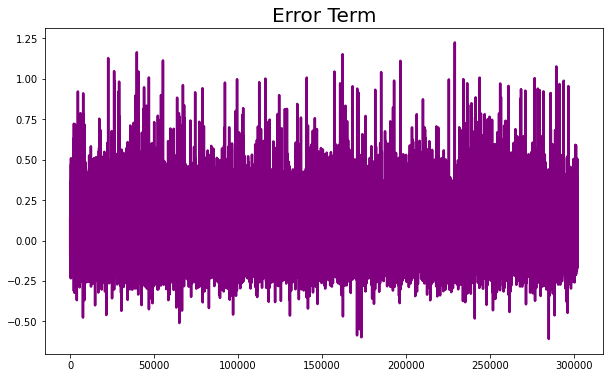

In [ ]:
# Error term
plt.figure(figsize= (10,6))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_xgb_test, color='purple', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

Now, look at the feature importance.

In [ ]:
importance_df= pd.DataFrame({'Features': features, 'Feature_importance': list(xgb_grid.best_estimator_.feature_importances_)})
importance_df

,Features,Feature_importance
0,vendor_id,0.002126
1,passenger_count,0.002046
2,pickup_longitude,0.014918
3,pickup_latitude,0.011991
4,dropoff_longitude,0.015166
5,dropoff_latitude,0.021980
6,Hour_of_Pickup,0.073003
7,month,0.019387
8,distance,0.563054
9,store_and_fwd_flag_N,0.003516


In [ ]:
importance_df.sort_values(by=['Feature_importance'],ascending=False,inplace=True)

Let's look it by using bar grabh.

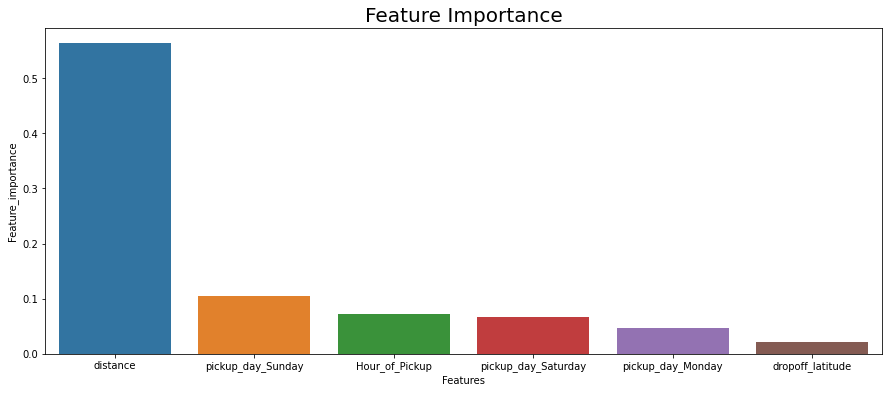

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Feature Importance', fontsize=20)
sns.barplot(x='Features',y="Feature_importance", data=importance_df[:6])
plt.show()

As per above data observation,we can say that distance is the top contributor to trip duration followed by different days of the weeks.

Error terms

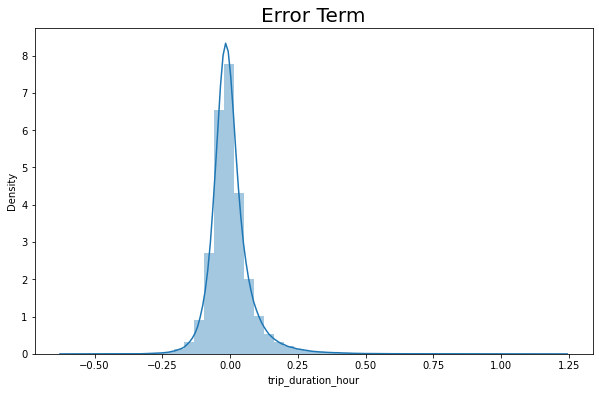

In [ ]:
# Plotting the error terms to understand
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_pred_xgb_test )
plt.title('Error Term', fontsize=20)
plt.show()


# Analysis of Models 

## Analyzing or Evaluation of the models

## For the Train data.

In [ ]:
# Models Summary for the Train data.
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
trn_mse= [lr_trn_mse, lasso_trn_mse, ridge_trn_mse, dt_trn_mse, xgb_trn_mse]
trn_rmse= [lr_trn_rmse, lasso_trn_rmse, ridge_trn_rmse, dt_trn_rmse, xgb_trn_rmse]
trn_r2= [lr_trn_r2, lasso_trn_r2, ridge_trn_r2, dt_trn_r2, xgb_trn_r2]
train_adjusted_r2= [lr_trn_r2_, lasso_trn_r2_, ridge_trn_r2_, dt_trn_r2_, xgb_trn_r2_]

## For the test data.


In [ ]:
# Models Summary for the test data
models= ['Linear Regression', 'Lasso Regression', 'Ridge Regression','DecisionTree Regressor','XGBoost Regressor']
tst_mse= [lr_tst_mse, lasso_tst_mse, ridge_tst_mse, dt_tst_mse, xgb_tst_mse]
tst_rmse= [lr_tst_rmse, lasso_tst_rmse, ridge_tst_rmse, dt_tst_rmse, xgb_tst_rmse]
tst_r2= [lr_tst_r2, lasso_tst_r2, ridge_tst_r2, dt_tst_r2, xgb_tst_r2]
test_adjusted_r2= [lr_tst_r2_, lasso_tst_r2_, ridge_tst_r2_, dt_tst_r2_, xgb_tst_r2_]

In [ ]:
Train_data_df=pd.DataFrame({'Model Name': models, 'Train MSE': trn_mse, 'Train RMSE': trn_rmse, 'Train R^2': trn_r2, 
                            'Train Adjusted R^2': train_adjusted_r2})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,0.012777,0.113037,0.596133,0.596125
1,Lasso Regression,0.012777,0.113037,0.596133,0.596126
2,Ridge Regression,0.012777,0.113037,0.596133,0.596126
3,DecisionTree Regressor,0.008663,0.093074,0.726190,0.726185
4,XGBoost Regressor,0.005227,0.072301,0.834770,0.834767


In [ ]:
Test_data_df= pd.DataFrame({'Model Name': models, 'Test MSE': tst_mse, 'Test RMSE': tst_rmse, 'Test R^2': tst_r2, 
                            'Test Adjusted R^2': test_adjusted_r2})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,0.012801,0.113140,0.595271,0.595248
1,Lasso Regression,0.012801,0.113140,0.595273,0.595251
2,Ridge Regression,0.012801,0.113140,0.595273,0.595250
3,DecisionTree Regressor,0.008855,0.094103,0.720010,0.719994
4,XGBoost Regressor,0.006090,0.078036,0.807459,0.807448


# **Conclusion**

*   Their is no much difference between **Decision Tree** and **XGBoost Regressor** during traing and testing time as we can notice it on that MSE and RMSE which are the metrics used to evaluate the performance of regression models and R^2 is about same during training and Testing time.
 
 
*  Performance of linear model is low or not good compare to Xgbooster models.

 
 
 
 
*   To predict the trip duration for a particular taxi, from above table we can conclude  that **XGBoost Regressor** is the best models as compare to the other models.